In [1]:
import pandas as pd

import numpy as np 


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
train_test_data=[train,test]

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape


(1459, 80)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

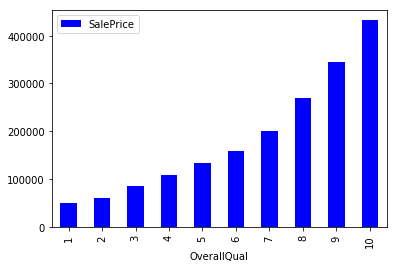

In [7]:
condition_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show

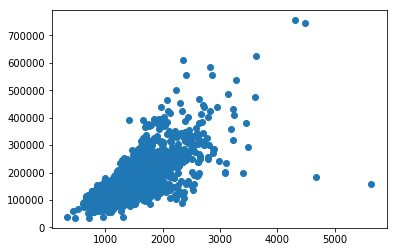

In [8]:
plt.scatter(x=train['GrLivArea'],y=train.SalePrice)
plt.show()

In [9]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [11]:
street_mapping={'Pave':1,'Grvl':0}
for dataset in train_test_data:
    dataset['Street']=dataset['Street'].map(street_mapping)

In [12]:
train.Street.unique()

array([1, 0])

In [13]:
test.MSSubClass.describe()

count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [14]:
test.MSZoning.describe()

count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

In [15]:
test['MSZoning']=test['MSZoning'].fillna('RL')

In [16]:
train.MSZoning.describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

In [17]:
zoning_mapping={"RL":1,"RM":2,"C (all)":3,"FV":4,"RH":5}
for dataset in train_test_data:
    dataset['MSZoning']=dataset['MSZoning'].map(zoning_mapping)

In [18]:
train.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [19]:
test.Utilities.describe()

count       1457
unique         1
top       AllPub
freq        1457
Name: Utilities, dtype: object

In [20]:
test['Utilities']=test['Utilities'].fillna('AllPub')

In [21]:
test.Utilities.describe()

count       1459
unique         1
top       AllPub
freq        1459
Name: Utilities, dtype: object

In [22]:
utilities_mapping={'AllPub':1,'NoSeWa':0}
for dataset in train_test_data:
    dataset['Utilities']=dataset['Utilities'].map(utilities_mapping)

In [23]:
train.Utilities.describe()

count    1460.000000
mean        0.999315
std         0.026171
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Utilities, dtype: float64

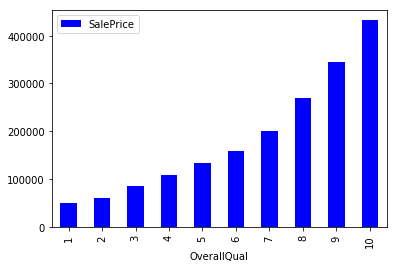

In [24]:
condition_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

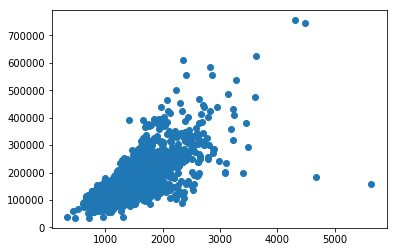

In [25]:
plt.scatter(x=train['GrLivArea'],y=train.SalePrice)
plt.show()

In [26]:
median=train.loc[train['GrLivArea']<4500,'GrLivArea'].median()
train['GrLivArea']=np.where(train['GrLivArea']>4500,median,train['GrLivArea'])

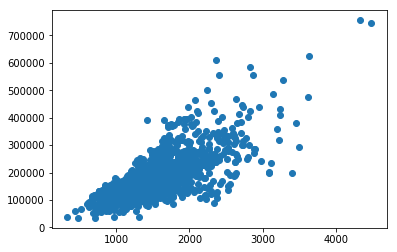

In [27]:
plt.scatter(x=train['GrLivArea'],y=train.SalePrice)
plt.show()

In [28]:
train.GrLivArea.describe()

count    1460.000000
mean     1510.398630
std       507.533521
min       334.000000
25%      1129.500000
50%      1461.500000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64

In [29]:
train['GrLivArea']=train['GrLivArea'].astype(int)
test['GrLivArea']=test['GrLivArea'].astype(int)

In [30]:
test.GarageCars.describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

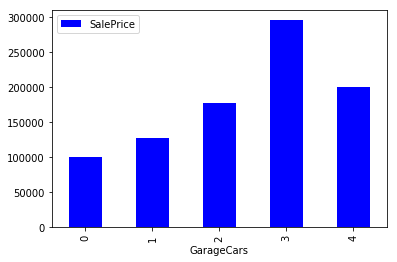

In [31]:
condition_pivot=train.pivot_table(index='GarageCars',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [32]:
test['GarageCars']=test['GarageCars'].fillna(1)

In [33]:
train.GarageCars.describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [34]:
test.GarageArea.describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [35]:
test['GarageArea']=test['GarageArea'].fillna(473)

In [36]:
test.GarageArea.describe()

count    1459.000000
mean      472.769020
std       216.974165
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [37]:
train['GarageArea']=train['GarageArea'].astype(int)
test['GarageArea']=test['GarageArea'].astype(int)

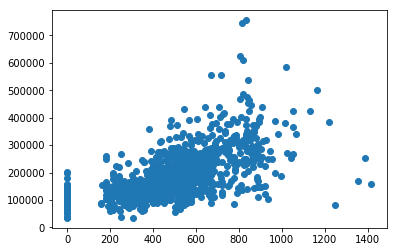

In [38]:
plt.scatter(x=train.GarageArea,y=train.SalePrice)
plt.show()

In [39]:
median=train.loc[train['GarageArea']<1220,'GarageArea'].median()
train['GarageArea']=np.where(train['GarageArea']>1220,median,train['GarageArea'])

In [40]:
test.GarageArea.describe()

count    1459.000000
mean      472.769020
std       216.974165
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [41]:
test.TotalBsmtSF.describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [42]:
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(1046)

In [43]:
test.TotalBsmtSF.describe()

count    1459.000000
mean     1046.117889
std       442.746712
min         0.000000
25%       784.000000
50%       988.000000
75%      1304.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

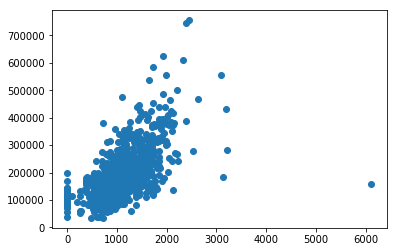

In [44]:
plt.scatter(x=train.TotalBsmtSF,y=train.SalePrice)
plt.show()

In [45]:
median=train.loc[train['TotalBsmtSF']<4500,'TotalBsmtSF'].median()
train['TotalBsmtSF']=np.where(train['TotalBsmtSF']>4500,median,train['TotalBsmtSF'])

In [46]:
test.TotalBsmtSF.describe()

count    1459.000000
mean     1046.117889
std       442.746712
min         0.000000
25%       784.000000
50%       988.000000
75%      1304.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

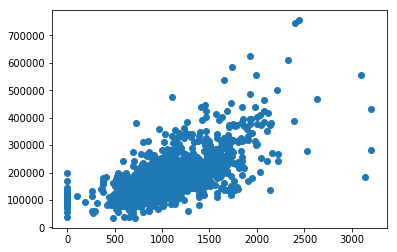

In [47]:
plt.scatter(x=train.TotalBsmtSF,y=train.SalePrice)
plt.show()

In [48]:
test['1stFlrSF'].describe()

count    1459.000000
mean     1156.534613
std       398.165820
min       407.000000
25%       873.500000
50%      1079.000000
75%      1382.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

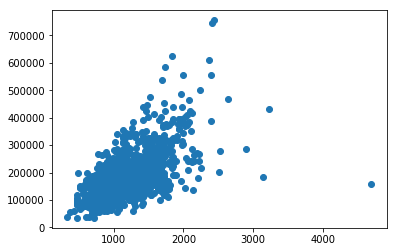

In [49]:
plt.scatter(x=train['1stFlrSF'],y=train.SalePrice)
plt.show()

In [50]:
median=train.loc[train['1stFlrSF']<4000,'1stFlrSF'].median()
train['1stFlrSF']=np.where(train['1stFlrSF']>4000,median,train['1stFlrSF'])

In [51]:
train['1stFlrSF'].describe()

count    1460.000000
mean     1160.156849
std       375.380232
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.000000
max      3228.000000
Name: 1stFlrSF, dtype: float64

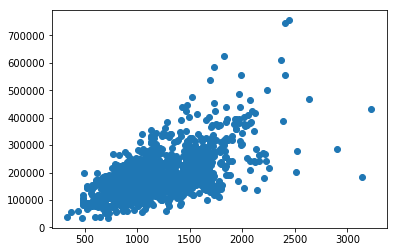

In [52]:
plt.scatter(x=train['1stFlrSF'],y=train.SalePrice)
plt.show()

In [53]:
test.FullBath.describe()

count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64

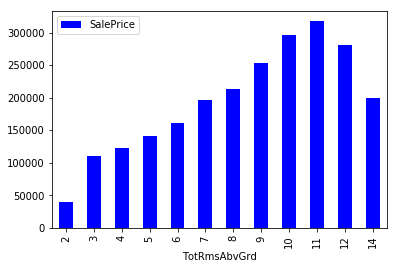

In [54]:
c_pivot=train.pivot_table(index='TotRmsAbvGrd',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [55]:
median=train.loc[train['TotRmsAbvGrd']<13,'TotRmsAbvGrd'].median()
train['TotRmsAbvGrd']=np.where(train['TotRmsAbvGrd']>13,median,train['TotRmsAbvGrd'])

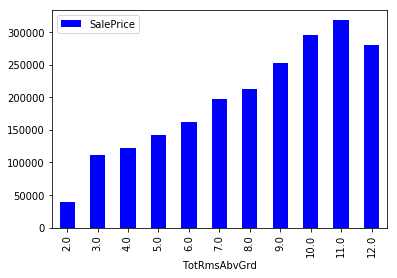

In [56]:
c_pivot=train.pivot_table(index='TotRmsAbvGrd',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [57]:
train.TotRmsAbvGrd.unique()

array([ 8.,  6.,  7.,  9.,  5., 11.,  4., 10., 12.,  3.,  2.])

In [58]:
train['TotRmsAbvGrd']=train['TotRmsAbvGrd'].astype(int)
test['TotRmsAbvGrd']=test['TotRmsAbvGrd'].astype(int)

In [59]:
test.TotRmsAbvGrd.unique()

array([ 5,  6,  7,  4, 10,  8,  9,  3, 12, 11, 13, 15])

In [60]:
train.YearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

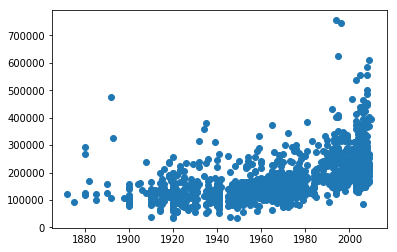

In [61]:
plt.scatter(x=train['YearBuilt'],y=train.SalePrice)
plt.show()

In [62]:
train.YearRemodAdd.describe()
                            

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

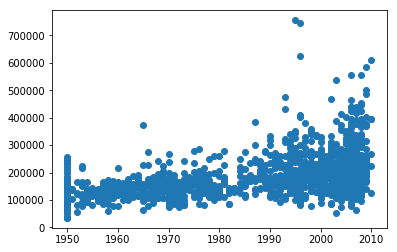

In [63]:
plt.scatter(x=train.YearRemodAdd,y=train.SalePrice)
plt.show()

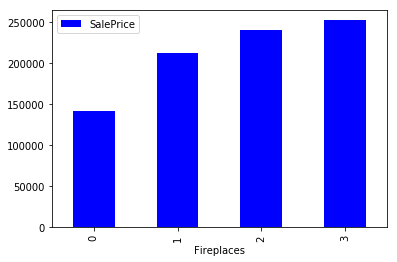

In [64]:
c_pivot=train.pivot_table(index='Fireplaces',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [65]:
test.Fireplaces.unique()

array([0, 1, 2, 3, 4])

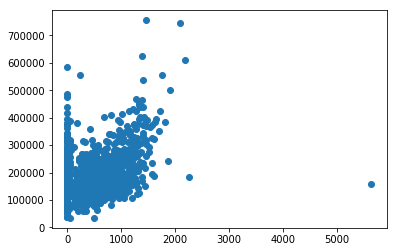

In [66]:
plt.scatter(x=train['BsmtFinSF1'],y=train.SalePrice)
plt.show()

In [67]:
test.BsmtFinSF1.describe()

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

In [68]:
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(440)

In [69]:
train.BsmtFinSF1.describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [70]:
test.YrSold.describe()

count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [71]:
test.OverallCond.describe()

count    1459.000000
mean        5.553804
std         1.113740
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

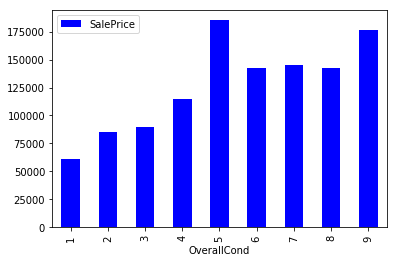

In [72]:
condition_pivot=train.pivot_table(index='OverallCond',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [73]:
train.MSSubClass.describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

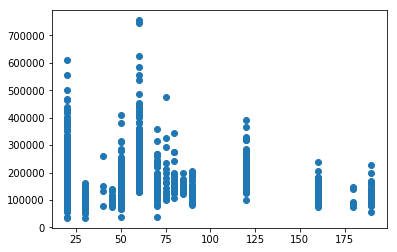

In [74]:
plt.scatter(x=train['MSSubClass'],y=train.SalePrice)
plt.show()

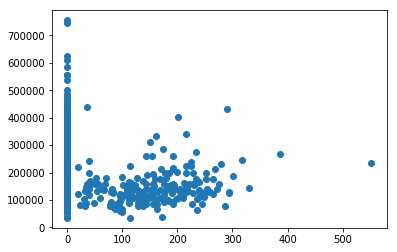

In [75]:
plt.scatter(x=train.EnclosedPorch,y=train.SalePrice)
plt.show()


In [76]:
median=train.loc[train['EnclosedPorch']<400,'EnclosedPorch'].median()
train['EnclosedPorch']=np.where(train['EnclosedPorch']>400,median,train['EnclosedPorch'])

In [77]:
train.EnclosedPorch.describe()

count    1460.000000
mean       21.576027
std        59.524576
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       386.000000
Name: EnclosedPorch, dtype: float64

In [78]:
test.KitchenAbvGr.describe()

count    1459.000000
mean        1.042495
std         0.208472
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64

In [79]:
train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,1,80.0,9600,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,1,68.0,11250,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,1,60.0,9550,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,1,84.0,14260,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,1,85.0,14115,1,NaN,IR1,Lvl,1,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,1,75.0,10084,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,1,NaN,10382,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,2,51.0,6120,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,1,50.0,7420,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [80]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [81]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()


,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,2,4,4,5,3,25,9,8,5,8,...,6,3,5,5,3,3,4,4,9,6
top,Grvl,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,50,925,1311,1052,1382,225,1260,1445,1220,726,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [82]:
test.LotShape.describe()

count     1459
unique       4
top        Reg
freq       934
Name: LotShape, dtype: object

In [83]:
lotshape_mapping={ 'IR1': 1,'IR2': 2,'IR3': 3,'Reg': 4 }
for d in train_test_data:
    d['LotShape']=d['LotShape'].map(lotshape_mapping)

In [84]:
test.LandContour.describe()

count     1459
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

In [85]:
land_mapping={'Bnk':1,'HLS':2,'Low':3,'Lvl':4}
for dataset in train_test_data:
    dataset['LandContour']=dataset['LandContour'].map(land_mapping)

In [86]:
test.LandContour.describe()

count    1459.000000
mean        3.776559
std         0.701340
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: LandContour, dtype: float64

In [87]:
test.LotConfig.describe()

count       1459
unique         5
top       Inside
freq        1081
Name: LotConfig, dtype: object

In [88]:
lotconfig_mapping={'Inside':0,'FR2':0,'Corner':0,'FR3':1,'CulDSac':1}
for dataset in train_test_data:
    dataset['LotConfig']=dataset['LotConfig'].map(lotconfig_mapping)

In [89]:
test.LotConfig.describe()

count    1459.000000
mean        0.063057
std         0.243149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LotConfig, dtype: float64

In [90]:
test.LandSlope.describe()

count     1459
unique       3
top        Gtl
freq      1396
Name: LandSlope, dtype: object

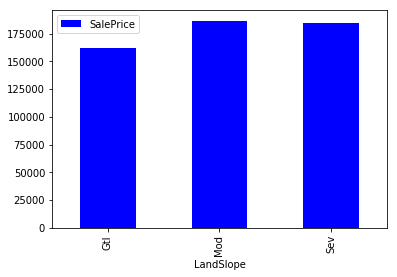

In [91]:
condition_pivot=train.pivot_table(index='LandSlope',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [92]:
landslope_mapping={'Gtl':0,'Mod':1,'Sev':1}
for dataset in train_test_data:
    dataset['LandSlope']=dataset['LandSlope'].map(landslope_mapping)

In [93]:
test.Neighborhood.describe()

count      1459
unique       25
top       NAmes
freq        218
Name: Neighborhood, dtype: object

In [94]:
n_map={'Blmngtn':1,'Blueste':0,'BrDale':0,'BrkSide':0,'ClearCr':1,
              'CollgCr':1,'Crawfor':1,'Edwards':0,'Gilbert':1,'IDOTRR':0,
            'MeadowV':0,'Mitchel':0,'NAmes':0,'NPkVill':0,'NWAmes':1,'NoRidge':2,
             'NridgHt':2,'OldTown':0,'SWISU':0,'Sawyer':0,'SawyerW':1,
             'Somerst':1,'StoneBr':2,'Timber':1,'Veenker':1}
for data in train_test_data:
    data['Neighborhood']=data['Neighborhood'].map(n_map)

In [95]:
test.Neighborhood.unique()

array([0, 1, 2])

In [96]:
train.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

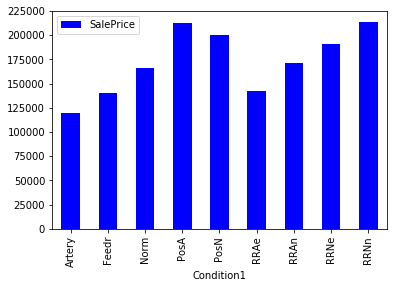

In [97]:
condition_pivot=train.pivot_table(index='Condition1',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [98]:
test.BldgType.describe()

count     1459
unique       5
top       1Fam
freq      1205
Name: BldgType, dtype: object

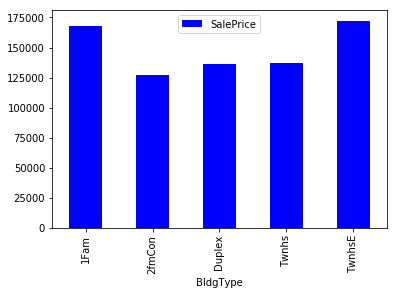

In [99]:
condition_pivot=train.pivot_table(index='BldgType',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [100]:
bldg_mapping={'1Fam':1,'TwnhsE':1,'2fmCon': 0,'Duplex':0,'Twnhs':0}
for dataset in train_test_data:
    dataset['BldgType']=dataset['BldgType'].map(bldg_mapping)

In [101]:
test.BldgType.describe()

count    1459.000000
mean        0.903358
std         0.295570
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: BldgType, dtype: float64

In [102]:
train.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

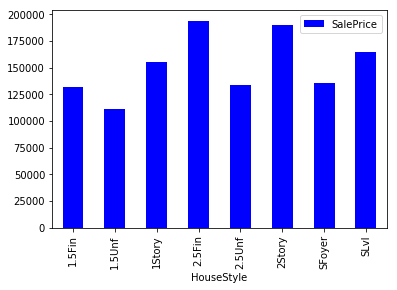

In [103]:
condition_pivot=train.pivot_table(index='HouseStyle',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [104]:
housestyle_mapping={"1.5Fin":0,"1.5Unf":0,"1Story":1,"2.5Fin":2,"2.5Unf":0,"2Story":2,"SFoyer":0,"SLvl":1}
for dataset in train_test_data:
    dataset['HouseStyle']=dataset['HouseStyle'].map(housestyle_mapping)
    


In [105]:
train.HouseStyle.unique()

array([2, 1, 0])

In [106]:
train.RoofStyle.describe()

count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object

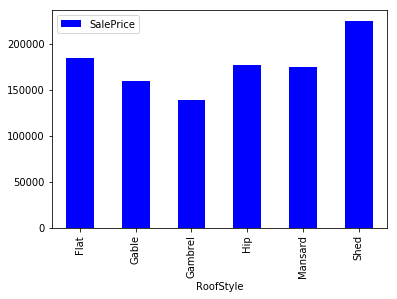

In [107]:
condition_pivot=train.pivot_table(index='RoofStyle',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [108]:
roof_mapping={'Shed':2,'Flat':1,'Hip':1,'Mansard':1,'Gable':1,'Gambrel':0}
for dataset in train_test_data:
    dataset['RoofStyle']=dataset['RoofStyle'].map(roof_mapping)

In [109]:
test.RoofStyle.describe()

count    1459.000000
mean        0.994517
std         0.097837
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: RoofStyle, dtype: float64

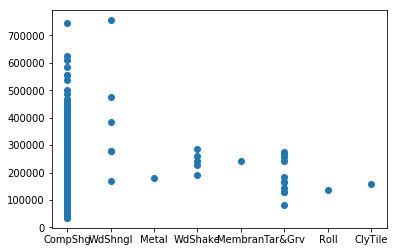

In [110]:
plt.scatter(x=train.RoofMatl,y=train.SalePrice)
plt.show()

In [111]:
test.Exterior1st.describe()

count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object

In [112]:
test['Exterior1st']=test['Exterior1st'].fillna('VinylSd')

In [113]:
test.Exterior1st.describe()

count        1459
unique         13
top       VinylSd
freq          511
Name: Exterior1st, dtype: object

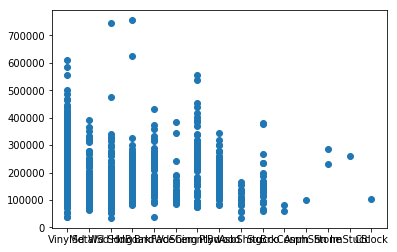

In [114]:
plt.scatter(x=train.Exterior1st,y=train.SalePrice)
plt.show()

In [115]:
train.MasVnrType.describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [116]:
train['MasVnrType']=train['MasVnrType'].fillna('None')
test['MasVnrType']=test['MasVnrType'].fillna('None')

In [117]:
test.MasVnrType.describe()

count     1459
unique       4
top       None
freq       894
Name: MasVnrType, dtype: object

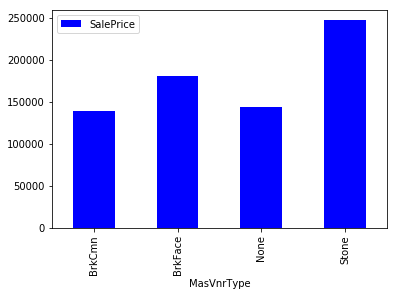

In [118]:
condition_pivot=train.pivot_table(index='MasVnrType',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [119]:
masvnr_mapping={'BrkCmn':0,'BrkFace':0,'None':0,'Stone':1}
for dataset in train_test_data:
    dataset['MasVnrType']=dataset['MasVnrType'].map(masvnr_mapping)

In [120]:
train.MasVnrType.unique()

array([0, 1])

In [121]:
test.ExterQual.describe()

count     1459
unique       4
top         TA
freq       892
Name: ExterQual, dtype: object

In [122]:
exter_mapping={'Ex':2,'Gd':1,'Fa':0,'TA':0}
for dataset in train_test_data:
    dataset['ExterQual']=dataset['ExterQual'].map(exter_mapping)
    

In [123]:
test.ExterCond.describe()

count     1459
unique       5
top         TA
freq      1256
Name: ExterCond, dtype: object

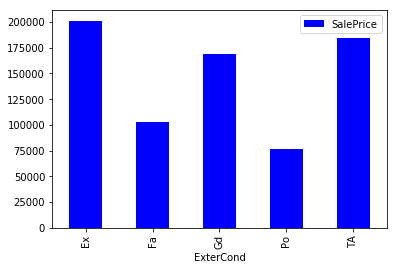

In [124]:
condition_pivot=train.pivot_table(index='ExterCond',values='SalePrice')
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [125]:
ex1_m={'Ex':1,'Fa':0,'Gd':1,'TA':1,'Po':0}
for dataset in train_test_data:
    dataset['ExterCond']=dataset['ExterCond'].map(ex1_m)

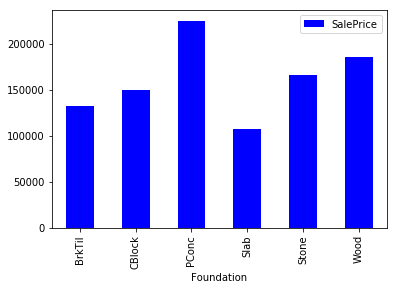

In [126]:
condition_pivot=train.pivot_table(index='Foundation',values='SalePrice')
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [127]:
test.Foundation.describe()

count      1459
unique        6
top       PConc
freq        661
Name: Foundation, dtype: object

In [128]:
fou_map={'PConc':1,'Slab':0,'Stone':0,'Wood':1,'CBlock':0,'BrkTil':0}
for dataset in train_test_data:
    dataset['Foundation']=dataset['Foundation'].map(fou_map)

In [129]:
test.BsmtQual.describe()

count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

In [130]:
train['BsmtQual']=train['BsmtQual'].fillna('TA')
test['BsmtQual']=test['BsmtQual'].fillna('TA')

In [131]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,1,80.0,9600,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,1,68.0,11250,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,1,60.0,9550,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,1,84.0,14260,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,1,85.0,14115,1,NaN,1,4,1,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,1,75.0,10084,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,1,NaN,10382,1,NaN,1,4,1,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,2,51.0,6120,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,1,50.0,7420,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


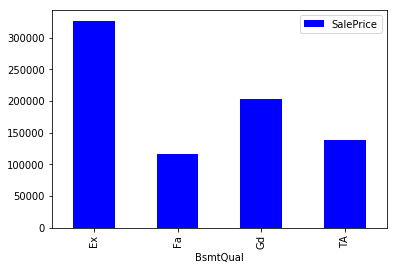

In [132]:
condition_pivot=train.pivot_table(index='BsmtQual',values='SalePrice')
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [133]:
bsmtqual_map={'Ex':1,'Fa':0,'Gd':0,'TA':0}
for data in train_test_data:
    data['BsmtQual']=data['BsmtQual'].map(bsmtqual_map)

In [134]:
test.BsmtQual.describe()

count    1459.000000
mean        0.093900
std         0.291789
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BsmtQual, dtype: float64

In [135]:
test.BsmtCond.describe()

count     1414
unique       4
top         TA
freq      1295
Name: BsmtCond, dtype: object

In [136]:
train['BsmtCond']=train['BsmtCond'].fillna('TA')
test['BsmtCond']=test['BsmtCond'].fillna('TA')

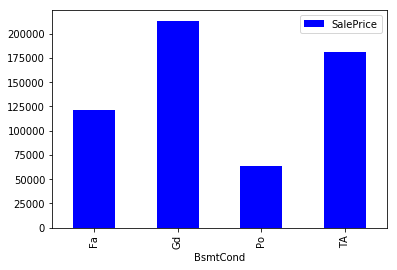

In [137]:
condition_pivot=train.pivot_table(index='BsmtCond',values='SalePrice')
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [138]:
test.BsmtExposure.describe()

count     1415
unique       4
top         No
freq       951
Name: BsmtExposure, dtype: object

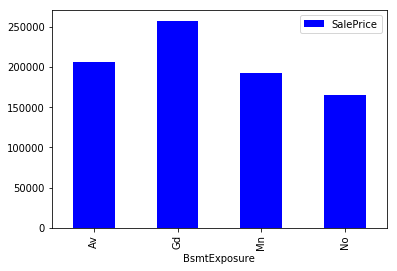

In [139]:
condition_pivot=train.pivot_table(index='BsmtExposure',values='SalePrice')
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [140]:
train.BsmtFinType2.describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [141]:
test.Heating.describe()

count     1459
unique       4
top       GasA
freq      1446
Name: Heating, dtype: object

In [142]:
heat_mapping={'Floor':0,'Grav':0,'OthW':1,'Wall':0,'GasA':2,'GasW':2}
for dataset in train_test_data:
    dataset['Heating']=dataset['Heating'].map(heat_mapping)

In [143]:
test.Heating.describe()

count    1459.000000
mean        1.994517
std         0.104613
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Heating, dtype: float64

In [144]:
train.HeatingQC.describe()

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object

In [145]:
hqual_map={'Ex':1,'Fa':0,'Gd':0,'Po':0,'TA':0}
for dataset in train_test_data:
    dataset['HeatingQC']=dataset['HeatingQC'].map(hqual_map)

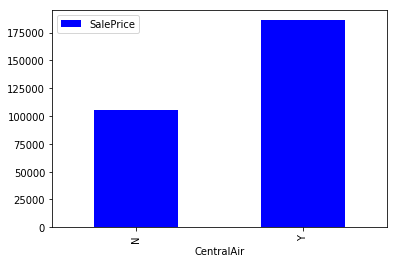

In [146]:
condition_pivot=train.pivot_table(index='CentralAir',values='SalePrice')
condition_pivot.plot(kind='bar',color='blue')
plt.show()

In [147]:
ca_map={'N':0,'Y':1}
for dataset in train_test_data:
    dataset['CentralAir']=dataset['CentralAir'].map(ca_map)

In [148]:
test.CentralAir.describe()

count    1459.000000
mean        0.930775
std         0.253924
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CentralAir, dtype: float64

In [149]:
test.Electrical.describe()

count      1459
unique        4
top       SBrkr
freq       1337
Name: Electrical, dtype: object

In [150]:
train['Electrical']=train['Electrical'].fillna('SBrkr')

In [151]:
train.Electrical.describe()

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object

In [152]:
ee_map={'SBrkr':1,'FuseA':0,'FuseF':0,'FuseP':0,'Mix':0}
for data in train_test_data:
    data['Electrical']=data['Electrical'].map(ee_map)

In [153]:
train.Electrical.describe()

count    1460.000000
mean        0.914384
std         0.279893
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Electrical, dtype: float64

In [154]:
train['1stFlrSF'].describe()

count    1460.000000
mean     1160.156849
std       375.380232
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.000000
max      3228.000000
Name: 1stFlrSF, dtype: float64

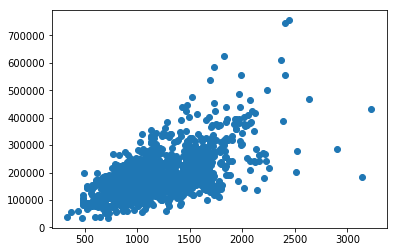

In [155]:
plt.scatter(x=train['1stFlrSF'],y=train.SalePrice)
plt.show()

In [156]:
median=train.loc[train['1stFlrSF']<2750,'1stFlrSF'].median()
train['1stFlrSF']=np.where(train['1stFlrSF']>2750,median,train['1stFlrSF'])

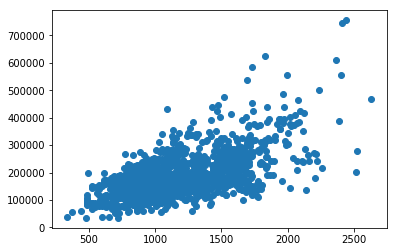

In [157]:
plt.scatter(x=train['1stFlrSF'],y=train.SalePrice)
plt.show()

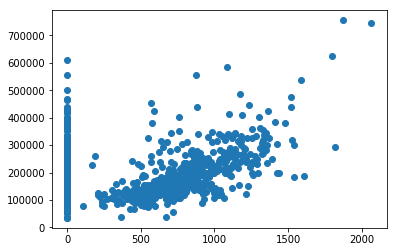

In [158]:
plt.scatter(x=train['2ndFlrSF'],y=train.SalePrice)
plt.show()

In [159]:
test['2ndFlrSF'].describe()

count    1459.000000
mean      325.967786
std       420.610226
min         0.000000
25%         0.000000
50%         0.000000
75%       676.000000
max      1862.000000
Name: 2ndFlrSF, dtype: float64

In [160]:
test.BsmtFullBath.describe()

count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [161]:
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0)

In [162]:
test.BsmtFullBath.describe()

count    1459.000000
mean        0.433859
std         0.530527
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [163]:
test.FullBath.describe()

count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64

In [164]:
test.BedroomAbvGr.describe()

count    1459.000000
mean        2.854010
std         0.829788
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64

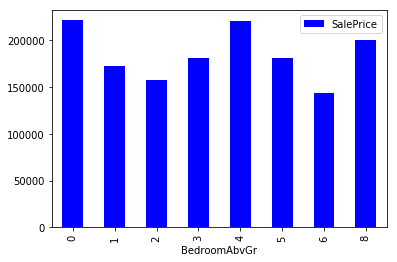

In [165]:
c_pivot=train.pivot_table(index='BedroomAbvGr',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [166]:
test.KitchenAbvGr.describe()

count    1459.000000
mean        1.042495
std         0.208472
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64

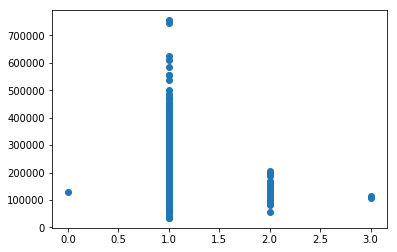

In [167]:
plt.scatter(x=train['KitchenAbvGr'],y=train.SalePrice)
plt.show()

In [168]:
test.KitchenQual.describe()

count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

In [169]:
test['KitchenQual']=test['KitchenQual'].fillna('TA')

In [170]:
test['KitchenQual'].describe()

count     1459
unique       4
top         TA
freq       758
Name: KitchenQual, dtype: object

In [171]:
test.TotRmsAbvGrd.describe()

count    1459.000000
mean        6.385195
std         1.508895
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64

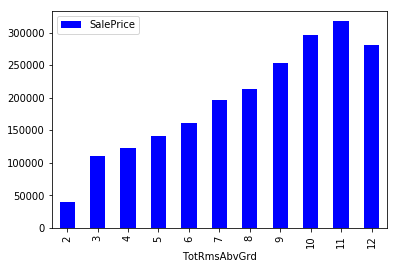

In [172]:
c_pivot=train.pivot_table(index='TotRmsAbvGrd',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [173]:
test.Functional.describe()

count     1457
unique       7
top        Typ
freq      1357
Name: Functional, dtype: object

In [174]:
test['Functional']=test['Functional'].fillna('Typ')

In [175]:
test.Functional.describe()

count     1459
unique       7
top        Typ
freq      1359
Name: Functional, dtype: object

In [176]:
func_map={'Maj2':0,'Sev':1,'Maj1':1,'Min1':1,'Min2':1,'Mod':1,'Typ':1}
for data in train_test_data:
    data['Functional']=data['Functional'].map(func_map)

In [177]:
test.Functional.describe()

count    1459.000000
mean        0.997258
std         0.052306
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Functional, dtype: float64

In [178]:
test.Fireplaces.describe()

count    1459.00000
mean        0.58122
std         0.64742
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         4.00000
Name: Fireplaces, dtype: float64

In [179]:
test.FireplaceQu.describe()

count     729
unique      5
top        Gd
freq      364
Name: FireplaceQu, dtype: object

In [180]:
train.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

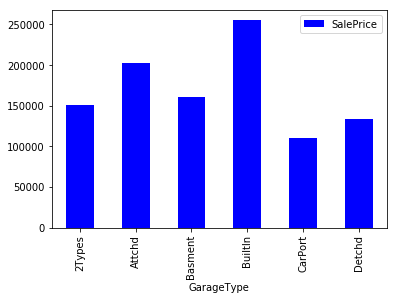

In [181]:
c_pivot=train.pivot_table(index='GarageType',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [182]:
train.GarageType.describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [183]:
train['GarageType']=train['GarageType'].fillna('Attchd')

In [184]:
test['GarageType']=test['GarageType'].fillna('Attchd')

In [185]:
test.GarageType.describe()

count       1459
unique         6
top       Attchd
freq         929
Name: GarageType, dtype: object

In [186]:
garagetype_map={'CarPort':0,'Detchd':0,'2Types':1,'Attchd':1,'Basment':1,'BuiltIn':2}
for data in train_test_data:
    data['GarageType']=data['GarageType'].map(garagetype_map)

In [187]:
test.GarageType.describe()

count    1459.000000
mean        0.794380
std         0.545787
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: GarageType, dtype: float64

In [188]:
 test.GarageCond.describe()

count     1381
unique       5
top         TA
freq      1328
Name: GarageCond, dtype: object

In [189]:
train['GarageQual']=train['GarageQual'].fillna('TA')
test['GarageQual']=test['GarageQual'].fillna('TA')

In [190]:
test.GarageQual.describe()

count     1459
unique       4
top         TA
freq      1371
Name: GarageQual, dtype: object

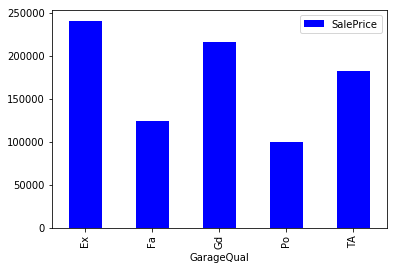

In [191]:
c_pivot=train.pivot_table(index='GarageQual',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [192]:
gqual_map={'Ex':1,'Gd':1,'TA':1,'Po':0,'Fa':0,991.0:0}
for data in train_test_data:
    data['GarageQual']=data['GarageQual'].map(gqual_map)

In [193]:
test.PavedDrive.describe()

count     1459
unique       3
top          Y
freq      1301
Name: PavedDrive, dtype: object

In [194]:
pav={'N':0,'P':0,'Y':1}
for data in train_test_data:
    data['PavedDrive']=data['PavedDrive'].map(pav)

In [195]:
train.PavedDrive.describe()

count    1460.000000
mean        0.917808
std         0.274751
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PavedDrive, dtype: float64

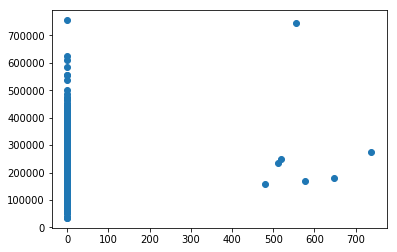

In [196]:
plt.scatter(x=train.PoolArea,y=train.SalePrice)
plt.show()

In [197]:
train.PoolQC.describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [198]:
test.MiscVal.unique()

array([    0, 12500,   500,  1500,   300,   450,    80,   600,   490,
        1200,   650,   400,   900,  2500,   700,   750,  2000,  6500,
        1000,  4500,  3000, 17000,  1512,   455,   460,   420])

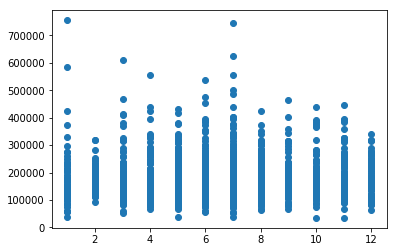

In [199]:
plt.scatter(x=train.MoSold,y=train.SalePrice)
plt.show()

In [200]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,1,80.0,9600,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,1,68.0,11250,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,1,60.0,9550,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,1,84.0,14260,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,1,85.0,14115,1,NaN,1,4,1,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,1,75.0,10084,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,1,NaN,10382,1,NaN,1,4,1,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,2,51.0,6120,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,1,50.0,7420,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [201]:
test.PoolArea.describe()

count    1459.000000
mean        1.744345
std        30.491646
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

In [202]:
median=1
train['PoolArea']=train['PoolArea'].mask(train['PoolArea']>1,median)

In [203]:
test.PoolArea.unique()

array([  0, 144, 368, 444, 228, 561, 800])

In [204]:
median=1
test['PoolArea']=test['PoolArea'].mask(test['PoolArea']>1,median)

In [205]:
test.PoolArea.describe()

count    1459.000000
mean        0.004112
std         0.064018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PoolArea, dtype: float64

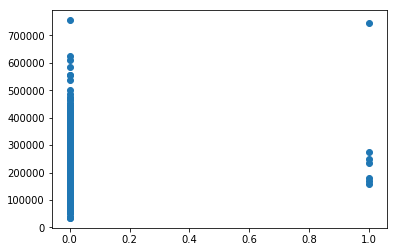

In [206]:
plt.scatter(x=train.PoolArea,y=train.SalePrice)
plt.show()

In [207]:
train.Fence.describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

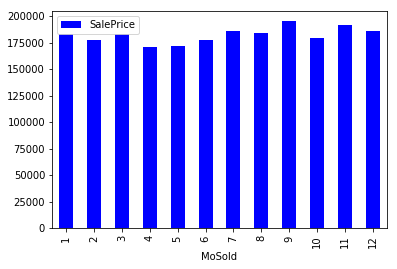

In [208]:
c_pivot=train.pivot_table(index='MoSold',values='SalePrice')
c_pivot.plot(kind='bar',color='blue')
plt.show()

In [209]:
test.SaleType.describe()

count     1458
unique       9
top         WD
freq      1258
Name: SaleType, dtype: object

In [210]:
test['SaleType']=test['SaleType'].fillna('WD')

In [211]:
test.SaleType.describe()

count     1459
unique       9
top         WD
freq      1259
Name: SaleType, dtype: object

In [212]:
saletype_map={'COD':0,'CWD':1,'Con':2,'ConLD':0,'ConLI':1,'ConLw':0,'New':2,'Oth':0,'WD':1}
for data in train_test_data:
    data['SaleType']=data['SaleType'].map(saletype_map)


In [213]:
train.SaleType.unique()

array([1, 2, 0])

In [214]:
test.SaleCondition.describe()

count       1459
unique         6
top       Normal
freq        1204
Name: SaleCondition, dtype: object

In [215]:
scond_map={'Abnorml':0,'AdjLand':0,'Alloca':0,'Family':0,'Normal':0,'Partial':1}
for  data in train_test_data:
    data['SaleCondition']=data['SaleCondition'].map(scond_map)

In [216]:
test.SaleCondition.unique()

array([0, 1])

In [217]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,2,2008,1,0,208500
1,2,20,1,80.0,9600,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,5,2007,1,0,181500
2,3,60,1,68.0,11250,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,9,2008,1,0,223500
3,4,70,1,60.0,9550,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,2,2006,1,0,140000
4,5,60,1,84.0,14260,1,NaN,1,4,1,...,0,NaN,NaN,NaN,0,12,2008,1,0,250000
5,6,50,1,85.0,14115,1,NaN,1,4,1,...,0,NaN,MnPrv,Shed,700,10,2009,1,0,143000
6,7,20,1,75.0,10084,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,8,2007,1,0,307000
7,8,60,1,NaN,10382,1,NaN,1,4,1,...,0,NaN,NaN,Shed,350,11,2009,1,0,200000
8,9,50,2,51.0,6120,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,4,2008,1,0,129900
9,10,190,1,50.0,7420,1,NaN,4,4,1,...,0,NaN,NaN,NaN,0,1,2008,1,0,118000


In [218]:
train=train.drop(['LotFrontage'],axis=1)
test=test.drop(['LotFrontage'],axis=1)

In [219]:
train=train.drop(['LotArea'],axis=1)
test=test.drop(['LotArea'],axis=1)

In [220]:
train=train.drop(['Alley'],axis=1)
test=test.drop(['Alley'],axis=1)
train=train.drop(['Condition1'],axis=1)
test=test.drop(['Condition1'],axis=1)
train=train.drop(['Condition2'],axis=1)
test=test.drop(['Condition2'],axis=1)
train=train.drop(['RoofMatl'],axis=1)
test=test.drop(['RoofMatl'],axis=1)
train=train.drop(['Exterior1st'],axis=1)
test=test.drop(['Exterior1st'],axis=1)
train=train.drop(['Exterior2nd'],axis=1)
test=test.drop(['Exterior2nd'],axis=1)
train=train.drop(['MasVnrArea'],axis=1)
test=test.drop(['MasVnrArea'],axis=1)
train=train.drop(['BsmtCond'],axis=1)
test=test.drop(['BsmtCond'],axis=1)

train=train.drop(['BsmtExposure'],axis=1)
test=test.drop(['BsmtExposure'],axis=1)
train=train.drop(['BsmtFinType1'],axis=1)
test=test.drop(['BsmtFinType1'],axis=1)
train=train.drop(['BsmtFinType2'],axis=1)
test=test.drop(['BsmtFinType2'],axis=1)
train=train.drop(['BsmtFinSF2'],axis=1)
test=test.drop(['BsmtFinSF2'],axis=1)
train=train.drop(['BsmtUnfSF'],axis=1)
test=test.drop(['BsmtUnfSF'],axis=1)
train=train.drop(['LowQualFinSF'],axis=1)
test=test.drop(['LowQualFinSF'],axis=1)
train=train.drop(['BsmtHalfBath'],axis=1)
test=test.drop(['BsmtHalfBath'],axis=1)
train=train.drop(['HalfBath'],axis=1)
test=test.drop(['HalfBath'],axis=1)
train=train.drop(['FireplaceQu'],axis=1)
test=test.drop(['FireplaceQu'],axis=1)
train=train.drop(['GarageYrBlt'],axis=1)
test=test.drop(['GarageYrBlt'],axis=1)
train=train.drop(['GarageFinish'],axis=1)
test=test.drop(['GarageFinish'],axis=1)
train=train.drop(['GarageCond'],axis=1)
test=test.drop(['GarageCond'],axis=1)
train=train.drop(['WoodDeckSF'],axis=1)
test=test.drop(['WoodDeckSF'],axis=1)
train=train.drop(['OpenPorchSF'],axis=1)
test=test.drop(['OpenPorchSF'],axis=1)
train=train.drop(['3SsnPorch'],axis=1)
test=test.drop(['3SsnPorch'],axis=1)
train=train.drop(['ScreenPorch'],axis=1)
test=test.drop(['ScreenPorch'],axis=1)
train=train.drop(['MiscFeature'],axis=1)
test=test.drop(['MiscFeature'],axis=1)
train=train.drop(['MiscVal'],axis=1)
test=test.drop(['MiscVal'],axis=1)
train=train.drop(['Fence'],axis=1)
test=test.drop(['Fence'],axis=1)
train=train.drop(['PoolQC'],axis=1)
test=test.drop(['PoolQC'],axis=1)
train=train.drop(['MoSold'],axis=1)
test=test.drop(['MoSold'],axis=1)






In [221]:
train

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,PavedDrive,EnclosedPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,1,4,4,1,0,0,1,...,2,548.0,1,1,0.0,0,2008,1,0,208500
1,2,20,1,1,4,4,1,0,0,1,...,2,460.0,1,1,0.0,0,2007,1,0,181500
2,3,60,1,1,1,4,1,0,0,1,...,2,608.0,1,1,0.0,0,2008,1,0,223500
3,4,70,1,1,1,4,1,0,0,1,...,3,642.0,1,1,272.0,0,2006,1,0,140000
4,5,60,1,1,1,4,1,0,0,2,...,3,836.0,1,1,0.0,0,2008,1,0,250000
5,6,50,1,1,1,4,1,0,0,0,...,2,480.0,1,1,0.0,0,2009,1,0,143000
6,7,20,1,1,4,4,1,0,0,1,...,2,636.0,1,1,0.0,0,2007,1,0,307000
7,8,60,1,1,1,4,1,0,0,1,...,2,484.0,1,1,228.0,0,2009,1,0,200000
8,9,50,2,1,4,4,1,0,0,0,...,2,468.0,0,1,205.0,0,2008,1,0,129900
9,10,190,1,1,4,4,1,0,0,0,...,1,205.0,1,1,0.0,0,2008,1,0,118000


In [222]:
test

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageCars,GarageArea,GarageQual,PavedDrive,EnclosedPorch,PoolArea,YrSold,SaleType,SaleCondition
0,1461,20,5,1,4,4,1,0,0,0,...,1,1.0,730,1,1,0,0,2010,1,0
1,1462,20,1,1,1,4,1,0,0,0,...,1,1.0,312,1,1,0,0,2010,1,0
2,1463,60,1,1,1,4,1,0,0,1,...,1,2.0,482,1,1,0,0,2010,1,0
3,1464,60,1,1,1,4,1,0,0,1,...,1,2.0,470,1,1,0,0,2010,1,0
4,1465,120,1,1,1,2,1,0,0,2,...,1,2.0,506,1,1,0,0,2010,1,0
5,1466,60,1,1,1,4,1,0,0,1,...,1,2.0,440,1,1,0,0,2010,1,0
6,1467,20,1,1,1,4,1,0,0,1,...,1,2.0,420,1,1,0,0,2010,1,0
7,1468,60,1,1,1,4,1,0,0,1,...,1,2.0,393,1,1,0,0,2010,1,0
8,1469,20,1,1,4,4,1,0,0,1,...,1,2.0,506,1,1,0,0,2010,1,0
9,1470,20,1,1,4,4,1,0,0,0,...,1,2.0,525,1,1,0,0,2010,1,0


In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn
from sklearn.model_selection import train_test_split

In [224]:
test.KitchenQual.describe()

count     1459
unique       4
top         TA
freq       758
Name: KitchenQual, dtype: object

In [225]:
kqual_map={'Ex':2,'Gd':1,'Fa':0,'TA':0}
for data in train_test_data:
    data['KitchenQual']=data['KitchenQual'].map(kqual_map)

In [226]:
train.KitchenQual.describe()

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

In [227]:
train=train.drop(['KitchenQual'],axis=1)
test=test.drop(['KitchenQual'],axis=1)

In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
MasVnrType       1460 non-null int64
ExterQual        1460 non-null int64
ExterCond        1460 non-null int64
Foundation       1460 non-null int64
BsmtQual         1460 non-null int64
BsmtFinSF1       1460 non-null int64
TotalBsmtSF      1460 non-null float64
Hea

In [229]:
train['TotalBsmtSF']=train['TotalBsmtSF'].astype(int)
train['1stFlrSF']=train['1stFlrSF'].astype(int)
train['GarageArea']=train['GarageArea'].astype(int)
train['EnclosedPorch']=train['EnclosedPorch'].astype(int)



In [230]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
MasVnrType       1460 non-null int64
ExterQual        1460 non-null int64
ExterCond        1460 non-null int64
Foundation       1460 non-null int64
BsmtQual         1460 non-null int64
BsmtFinSF1       1460 non-null int64
TotalBsmtSF      1460 non-null int64
Heati

In [231]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 48 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
Street           1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
MasVnrType       1459 non-null int64
ExterQual        1459 non-null int64
ExterCond        1459 non-null int64
Foundation       1459 non-null int64
BsmtQual         1459 non-null int64
BsmtFinSF1       1459 non-null float64
TotalBsmtSF      1459 non-null float64
H

In [232]:
test['TotalBsmtSF']=test['TotalBsmtSF'].astype(int)
test['BsmtFinSF1']=test['BsmtFinSF1'].astype(int)
test['BsmtFullBath']=test['BsmtFullBath'].astype(int)
test['GarageCars']=test['GarageCars'].astype(int)


In [233]:
X_train = train.drop("SalePrice",axis=1)

X_test  = test.drop("Id",axis=1).copy()


In [234]:
from sklearn import linear_model

In [235]:
clf=RandomForestClassifier()

In [236]:
Y_train=np.log(train.SalePrice)

In [237]:
Y_train.shape

(1460,)

In [238]:
X_train.shape

(1460, 48)

In [239]:
X_test.shape

(1459, 47)

In [240]:
X_train=X_train.drop(['Id'],axis=1)

In [241]:
X_train.shape

(1460, 47)

In [ ]:
model=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
clf.score(X_train,Y_train)

In [ ]:
Y_pred.shape

In [ ]:
test.shape

In [ ]:
Y_pred

In [ ]:
Y_pred_final=np.exp(Y_pred)

In [ ]:
Y_pred_final

In [ ]:
submission3 = pd.DataFrame({
        "Id": test["Id"],
        "Saleprice": Y_pred_final
    })
submission3.to_csv('akhirirasta1.csv', index=False)